In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import cv2
import imageio
from skimage.color import rgb2hsv, hsv2rgb

In [2]:
img = imageio.imread('03a857ce842d_02.jpg')
#img = img.astype(np.float32) / 255.
print(img.shape)

(1280, 1918, 3)


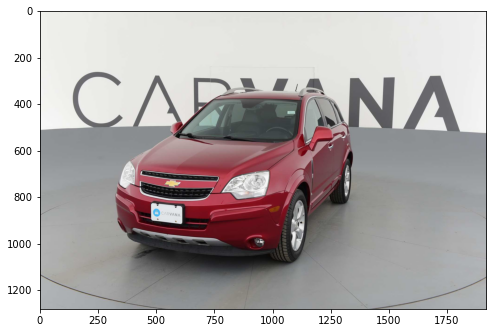

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [ ]:
fig = px.imshow(img)
fig.show()

from skimage.color import rgb2hsv, hsv2rgb

In [10]:
# перевод цветовой модели из rgb в hsv
def rgb2hsv(src):
    src = src / 255
    r,g,b = src[:,:,0],src[:,:,1],src[:,:,2]
    ma,mi = src.max(axis=2),src.min(axis=2)
    ma_mi = ma - mi
    
    b0 = ma > mi
    b1 = ma == r
    b2 = ma == g
    b3 = ma == b
    b4 = g >= b
    
    trg = np.zeros_like(src)
    h = trg[:,:,0]
    
    t1 = np.where(b0, 60*(g-b)/ma_mi, 0)
    t2 = np.where(b0, 60*(g-b)/ma_mi + 360.0, 0)
    t3 = np.where(b0, 60*(b-r)/ma_mi + 120.0, 0)
    t4 = np.where(b0, 60*(r-g)/ma_mi + 240.0, 0)
    
    h = np.where(b1 & b4,     t1, h)
    h = np.where(b1 & (1-b4), t2, h)
    h = np.where(b2,          t3, h)
    h = np.where(b3,          t4, h)
    
    trg[:,:,0] = h
    trg[:,:,1] = np.where(ma==0,0, 1-mi/ma)
    trg[:,:,2] = ma
    return trg

In [11]:
# перевод цветовой модели из hsv [360,1,1] в rgb [255,255,255]
def hsv2rgb(src):
    h,s,v = src[:,:,0],src[:,:,1],src[:,:,2]
    ih = h//60
    v_min = (1.0 - s)*v
    a = (v-v_min)*(h//60)/60
    v_inc = v_min + a
    v_dec = v - a
    
    r,g,b = v.copy(),v.copy(),v.copy()
    r = np.where(ih==1, v_dec, r)
    r = np.where(ih==2, v_min, r)
    r = np.where(ih==3, v_min, r)
    r = np.where(ih==4, v_inc, r)
    
    g = np.where(ih==0, v_inc, g)
    g = np.where(ih==3, v_dec, g)
    g = np.where(ih==4, v_min, g)
    g = np.where(ih==5, v_min, g)
    
    b = np.where(ih==0, v_min, b)
    b = np.where(ih==1, v_min, b)
    b = np.where(ih==2, v_inc, b)
    b = np.where(ih==5, v_dec, b)
    
    trg = np.zeros_like(src)
    trg[:,:,0] = r*255
    trg[:,:,1] = g*255
    trg[:,:,2] = b*255    
    return trg.astype('int32')

In [12]:
img_hsv = rgb2hsv(img)

D:\anaconda\anaconda3\envs\CNN\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\anaconda3\envs\CNN\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\anaconda3\envs\CNN\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\anaconda3\envs\CNN\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\anaconda3\envs\CNN\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [13]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


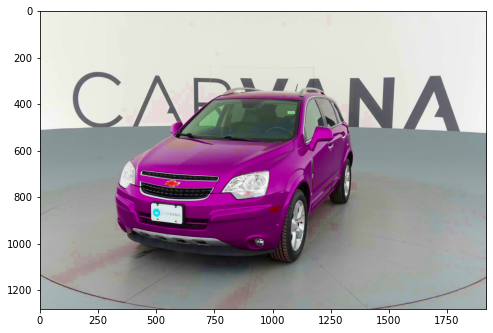

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Стандартные библиотки пошустрее будут